In [7]:
import tensorflow as tf

In [8]:
tf.__version__

'2.8.0'

In [2]:
#ses sinyallerinin özniteliklerini çıkarmak için splitAudioData.pynb dosyasında librosa kütüphanesini kullanmıştık
#burada rastegele 10 tane ses verisi alacağız ve bunları CNN algoritması kullanarak test edeceğiz


def features_extractor(file):
    audio, sample_rate = librosa.load(file, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import time
import librosa
import numpy as np

from tqdm import tqdm

In [4]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam

In [5]:
from sklearn import metrics
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

In [6]:
data = pd.read_csv('../audioData.csv')
data

,feature,class
0,[-6.6391638e+02 7.4633250e+00 -6.2418396e+01 ...,beeBird
1,[-5.16368103e+02 2.06674080e+01 -1.56551895e+...,beeBird
2,[-469.1672 9.647738 -137.6997 -1...,beeBird
3,[-6.3586462e+02 1.5384795e+01 -1.6060805e+02 ...,beeBird
4,[-5.0093127e+02 8.0044546e+00 -1.5133850e+02 ...,beeBird
...,...,...
2148,[-3.32472534e+02 1.16614426e+02 4.51772957e+...,pigeon
2149,[-262.14792 83.66872 14.975486 5...,pigeon
2150,[-284.36514 132.5125 42.36633 5...,pigeon
2151,[-282.64023 99.18566 29.451946 5...,pigeon


In [7]:
#verilerimizi import ediyoruz')

data['feature'][6]
newZ = []
counter = 0
for i in data['feature'][6].replace('\n', '').split(' '):
    if i != '':
        try:
            counter=counter+1
            newZ.append(float( re.sub("[^\d\.]", "", i)))
            #print(counter, float( re.sub("[^\d\.]", "", i)))
        except:
            continue

In [37]:
newZ

[1131.371,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [8]:

import re
newX = []
for j in range(0, len(data['feature'])):
    #print(j, data['feature'][j], )
    newP = []
    for i in data['feature'][j].replace('\n', '').split(' '):
        if i != '':
            try:
                #print(float( re.sub("[^\d\.]", "", i)))
                newP.append(float( re.sub("[^\d\.]", "", i)))
            except:
                print(j, 'isnt ok.')
                continue
    
    print(j, 'is ok.')
    newX.append(newP)

0 is ok.
1 is ok.
2 is ok.
3 is ok.
4 is ok.
5 is ok.
6 isnt ok.
6 is ok.
7 is ok.
8 is ok.
9 isnt ok.
9 is ok.
10 is ok.
11 is ok.
12 is ok.
13 is ok.
14 is ok.
15 is ok.
16 is ok.
17 is ok.
18 is ok.
19 is ok.
20 is ok.
21 is ok.
22 is ok.
23 is ok.
24 is ok.
25 is ok.
26 is ok.
27 is ok.
28 is ok.
29 is ok.
30 is ok.
31 is ok.
32 is ok.
33 is ok.
34 is ok.
35 is ok.
36 is ok.
37 isnt ok.
37 is ok.
38 is ok.
39 is ok.
40 is ok.
41 is ok.
42 is ok.
43 isnt ok.
43 is ok.
44 is ok.
45 isnt ok.
45 is ok.
46 is ok.
47 isnt ok.
47 is ok.
48 is ok.
49 isnt ok.
49 is ok.
50 is ok.
51 is ok.
52 isnt ok.
52 is ok.
53 is ok.
54 isnt ok.
54 is ok.
55 is ok.
56 is ok.
57 is ok.
58 is ok.
59 is ok.
60 is ok.
61 is ok.
62 isnt ok.
62 is ok.
63 is ok.
64 is ok.
65 is ok.
66 is ok.
67 is ok.
68 is ok.
69 is ok.
70 isnt ok.
70 is ok.
71 is ok.
72 isnt ok.
72 is ok.
73 is ok.
74 is ok.
75 is ok.
76 is ok.
77 is ok.
78 isnt ok.
78 is ok.
79 is ok.
80 is ok.
81 is ok.
82 is ok.
83 is ok.
84 is ok.
85 is 

In [9]:
newX = np.array(newX)
newX

array([[  6.6391638 ,   7.463325  ,   6.2418396 , ...,   1.1986932 ,
          1.0940291 ,   5.344674  ],
       [  5.16368103,   2.0667408 ,   1.56551895, ...,   1.25604904,
          2.24115086,   7.2818774 ],
       [469.1672    ,   9.647738  , 137.6997    , ...,   1.6974189 ,
          3.558661  ,   0.66746134],
       ...,
       [284.36514   , 132.5125    ,  42.36633   , ...,   1.5910071 ,
          1.6375576 ,   3.5378973 ],
       [282.64023   ,  99.18566   ,  29.451946  , ...,   2.44079   ,
          3.2088995 ,   1.9700946 ],
       [284.11053   ,  80.845634  ,   6.747492  , ...,   2.1589963 ,
          2.5575335 ,   2.9223695 ]])

In [12]:
x=np.array(data['feature'].tolist())
y=np.array(data['class'].tolist())

x


array(['[-6.6391638e+02  7.4633250e+00 -6.2418396e+01 -1.1284460e+01\n  2.5431734e+01  5.6306205e+00 -1.3656020e+01 -6.9390025e+00\n  9.0871906e+00  8.8431196e+00 -1.8967630e+00 -2.4932399e+00\n  1.1133687e+00 -8.8061196e-01  2.9537046e-01  8.1066245e-01\n -2.5200613e+00 -1.2921590e-01  7.9313564e-01  1.2898923e+00\n  1.6561134e+00 -1.0181050e+00  5.4621595e-01  1.2140846e+00\n  4.4717896e-01  1.2163692e+00 -6.2360018e-01 -1.6783326e+00\n  1.6662639e-01  2.5422633e+00  5.4980321e-03 -1.7003137e+00\n  1.9335809e+00  1.1121837e+00  4.2470855e-01  1.4603332e+00\n -1.4276305e+00 -1.1986932e+00  1.0940291e+00  5.3446740e-01]',
       '[-5.16368103e+02  2.06674080e+01 -1.56551895e+02 -2.27033195e+01\n  5.49985504e+01  1.54836187e+01 -2.58715954e+01 -1.73938732e+01\n  2.11223679e+01  1.98886967e+01 -1.22533655e+01 -4.82264900e+00\n  8.25416756e+00 -3.68105221e+00 -6.06306612e-01  5.52871861e-02\n -6.85204268e+00  1.15069234e+00  2.81761622e+00  1.74815524e+00\n -3.42416674e-01 -4.19345808e+00

In [41]:
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [42]:
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [13]:
xtrain, xtest, ytrain, ytest = train_test_split(newX, y, test_size=0.15, random_state=0)

In [15]:
y.shape

(2153,)

In [44]:
num_labels=9

In [45]:
model=Sequential()
model.add(Dense(125, input_shape=(40, )))
model.add(Activation('relu'))
model.add(Dropout(0.5))

#2. gizli
model.add(Dense(250))
model.add(Activation('relu'))
model.add(Dropout(0.5))

#3. gizli
model.add(Dense(125))
model.add(Activation('relu'))
model.add(Dropout(0.5))

#output
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [46]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 125)               5125      
                                                                 
 activation_8 (Activation)   (None, 125)               0         
                                                                 
 dropout_6 (Dropout)         (None, 125)               0         
                                                                 
 dense_9 (Dense)             (None, 250)               31500     
                                                                 
 activation_9 (Activation)   (None, 250)               0         
                                                                 
 dropout_7 (Dropout)         (None, 250)               0         
                                                                 
 dense_10 (Dense)            (None, 125)              

In [47]:
model.compile(loss='categorical_crossentropy', metrics=["accuracy"], optimizer="adam")

In [48]:
epochscount=300
num_batch_size=32

In [49]:
t0 = time.time()
history = model.fit(xtrain, ytrain, batch_size=num_batch_size, epochs=epochscount, validation_data=(xtest, ytest), verbose=1)
t1 = time.time()
print('Runtime: %.2f s' %(t1-t0))

Epoch 1/300
58/58 [==============================] - 1s 7ms/step - loss: 8.8628 - accuracy: 0.2470 - val_loss: 2.3734 - val_accuracy: 0.3406
Epoch 2/300
58/58 [==============================] - 0s 5ms/step - loss: 4.8206 - accuracy: 0.2645 - val_loss: 1.8300 - val_accuracy: 0.3932
Epoch 3/300
58/58 [==============================] - 0s 4ms/step - loss: 3.6323 - accuracy: 0.2918 - val_loss: 1.8273 - val_accuracy: 0.3963
Epoch 4/300
58/58 [==============================] - 0s 4ms/step - loss: 3.0832 - accuracy: 0.3246 - val_loss: 1.6924 - val_accuracy: 0.4520
Epoch 5/300
58/58 [==============================] - 0s 5ms/step - loss: 2.4308 - accuracy: 0.3361 - val_loss: 1.7006 - val_accuracy: 0.4675
Epoch 6/300
58/58 [==============================] - 0s 5ms/step - loss: 2.3141 - accuracy: 0.3568 - val_loss: 1.6761 - val_accuracy: 0.4830
Epoch 7/300
58/58 [==============================] - 0s 4ms/step - loss: 2.0117 - accuracy: 0.3596 - val_loss: 1.6203 - val_accuracy: 0.4954
Epoch 8/300
5

Text(0, 0.5, 'loss')

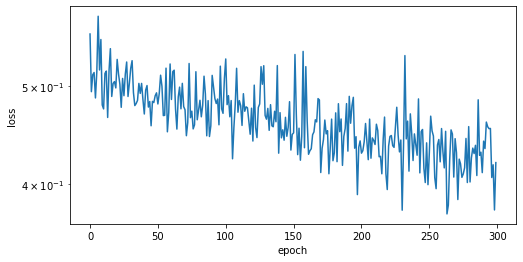

In [487]:
# Plot loss
plt.figure(figsize=(8,4))
plt.semilogy(history.history['loss'])
plt.xlabel('epoch'); plt.ylabel('loss')

In [61]:
validation_test_set_accuracy=model.evaluate(xtest, ytest, verbose=0)
print(validation_test_set_accuracy[1])

0.7213622331619263


In [489]:
xtest[1]

array([2.8373059, 1.0526962, 3.4451218, 5.5258396, 3.0436552, 1.4635709,
       3.0520094, 1.1657702, 1.7823097, 3.0396476, 1.2944512, 5.784286 ,
       1.2763754, 8.4384747, 1.1972279, 3.6598494, 8.7228966, 2.0704946,
       3.9429481, 6.3000351, 6.4605575, 2.198745 , 7.2112737, 2.7235341,
       1.7863247, 2.8759515, 1.725952 , 2.1138479, 1.0838553, 4.8017282,
       7.4913752, 3.8533278, 1.9259442, 5.718143 , 4.1760077, 5.0560517,
       3.4229281, 5.6647282, 4.2859941, 2.7654414])

In [51]:
fileName = "../testData/nightingale1222.wav"

In [53]:
testDataResult = features_extractor(fileName)

In [54]:
testDataResult=testDataResult.reshape(1, -1)
testDataResult.shape

(1, 40)

In [56]:
result_array=model.predict(testDataResult)
result_array

array([[0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [57]:
resultClasses=["beeBird", "eagle", "hawk", "hoopoe", "hummingBird", "littleOwl", "nightingale", "parrot", "pigeon"]
resultClasses

['beeBird',
 'eagle',
 'hawk',
 'hoopoe',
 'hummingBird',
 'littleOwl',
 'nightingale',
 'parrot',
 'pigeon']

In [58]:
result=np.argmax(result_array[0])
result

8

In [59]:
from IPython.display import Audio
Audio(fileName)

In [60]:
resultClasses[result]

'pigeon'